## Model Training

### 1.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [49]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from tensorflow.keras.regularizers import l2


import tensorflow as tf
import keras
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import Normalizer, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings

### Import the CSV Data as Pandas DataFrame

In [50]:
df = pd.read_csv('data/kc_house_data.csv')

### Show Top 5 Records

In [51]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [52]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [53]:
df.shape

(21613, 21)

In [54]:
df.drop("id", axis=1, inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [56]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [57]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [58]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


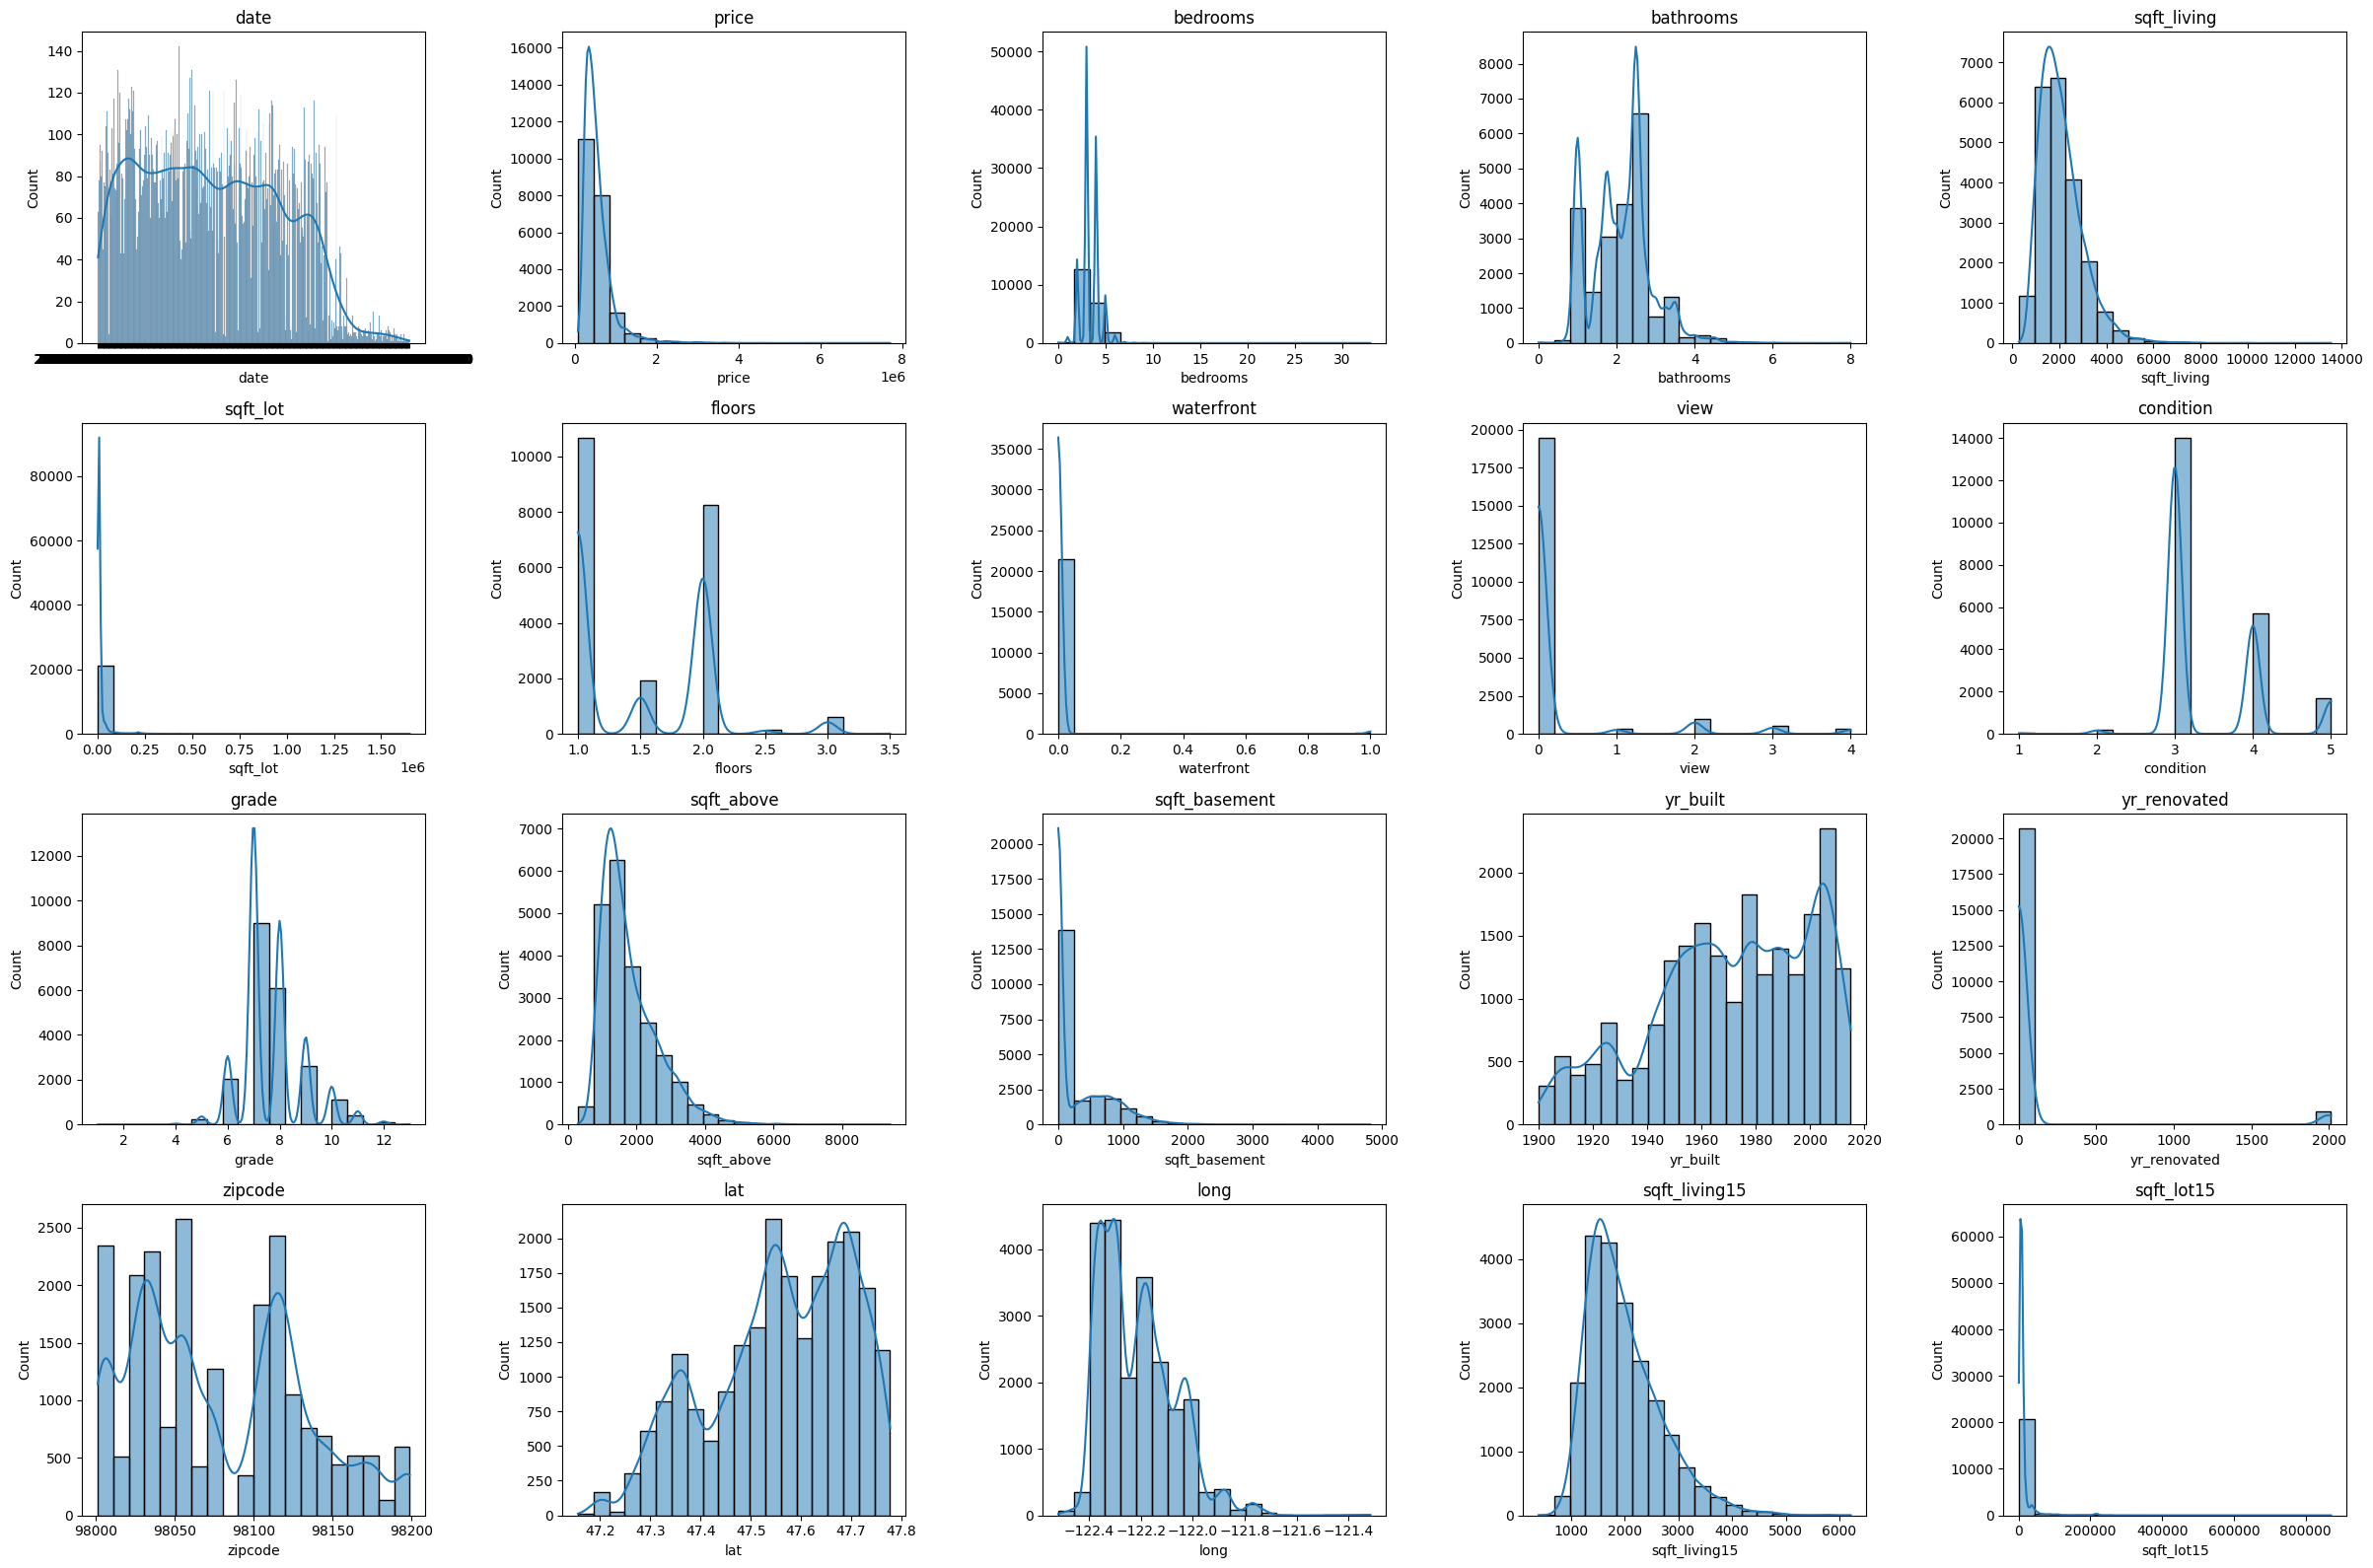

In [59]:
plt.figure(figsize=(24,16))
for feature in df.columns.to_list():
    plt.subplot(4,5, df.columns.to_list().index(feature)+1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()    

In [60]:
df['waterfront'].value_counts().reset_index()

,waterfront,count
0,0,21450
1,1,163


In [61]:
df['view'].value_counts().reset_index()

,view,count
0,0,19489
1,2,963
2,3,510
3,1,332
4,4,319


In [62]:
df['yr_renovated'].value_counts().reset_index()

,yr_renovated,count
0,0,20699
1,2014,91
2,2013,37
3,2003,36
4,2005,35
...,...,...
65,1951,1
66,1959,1
67,1948,1
68,1954,1


Most values of these three columns (yr_renovated,view,waterfront) are zero, so these columns are dropped.

In [63]:
df.drop(['waterfront','view','zipcode','yr_renovated'],axis=1,inplace=True)

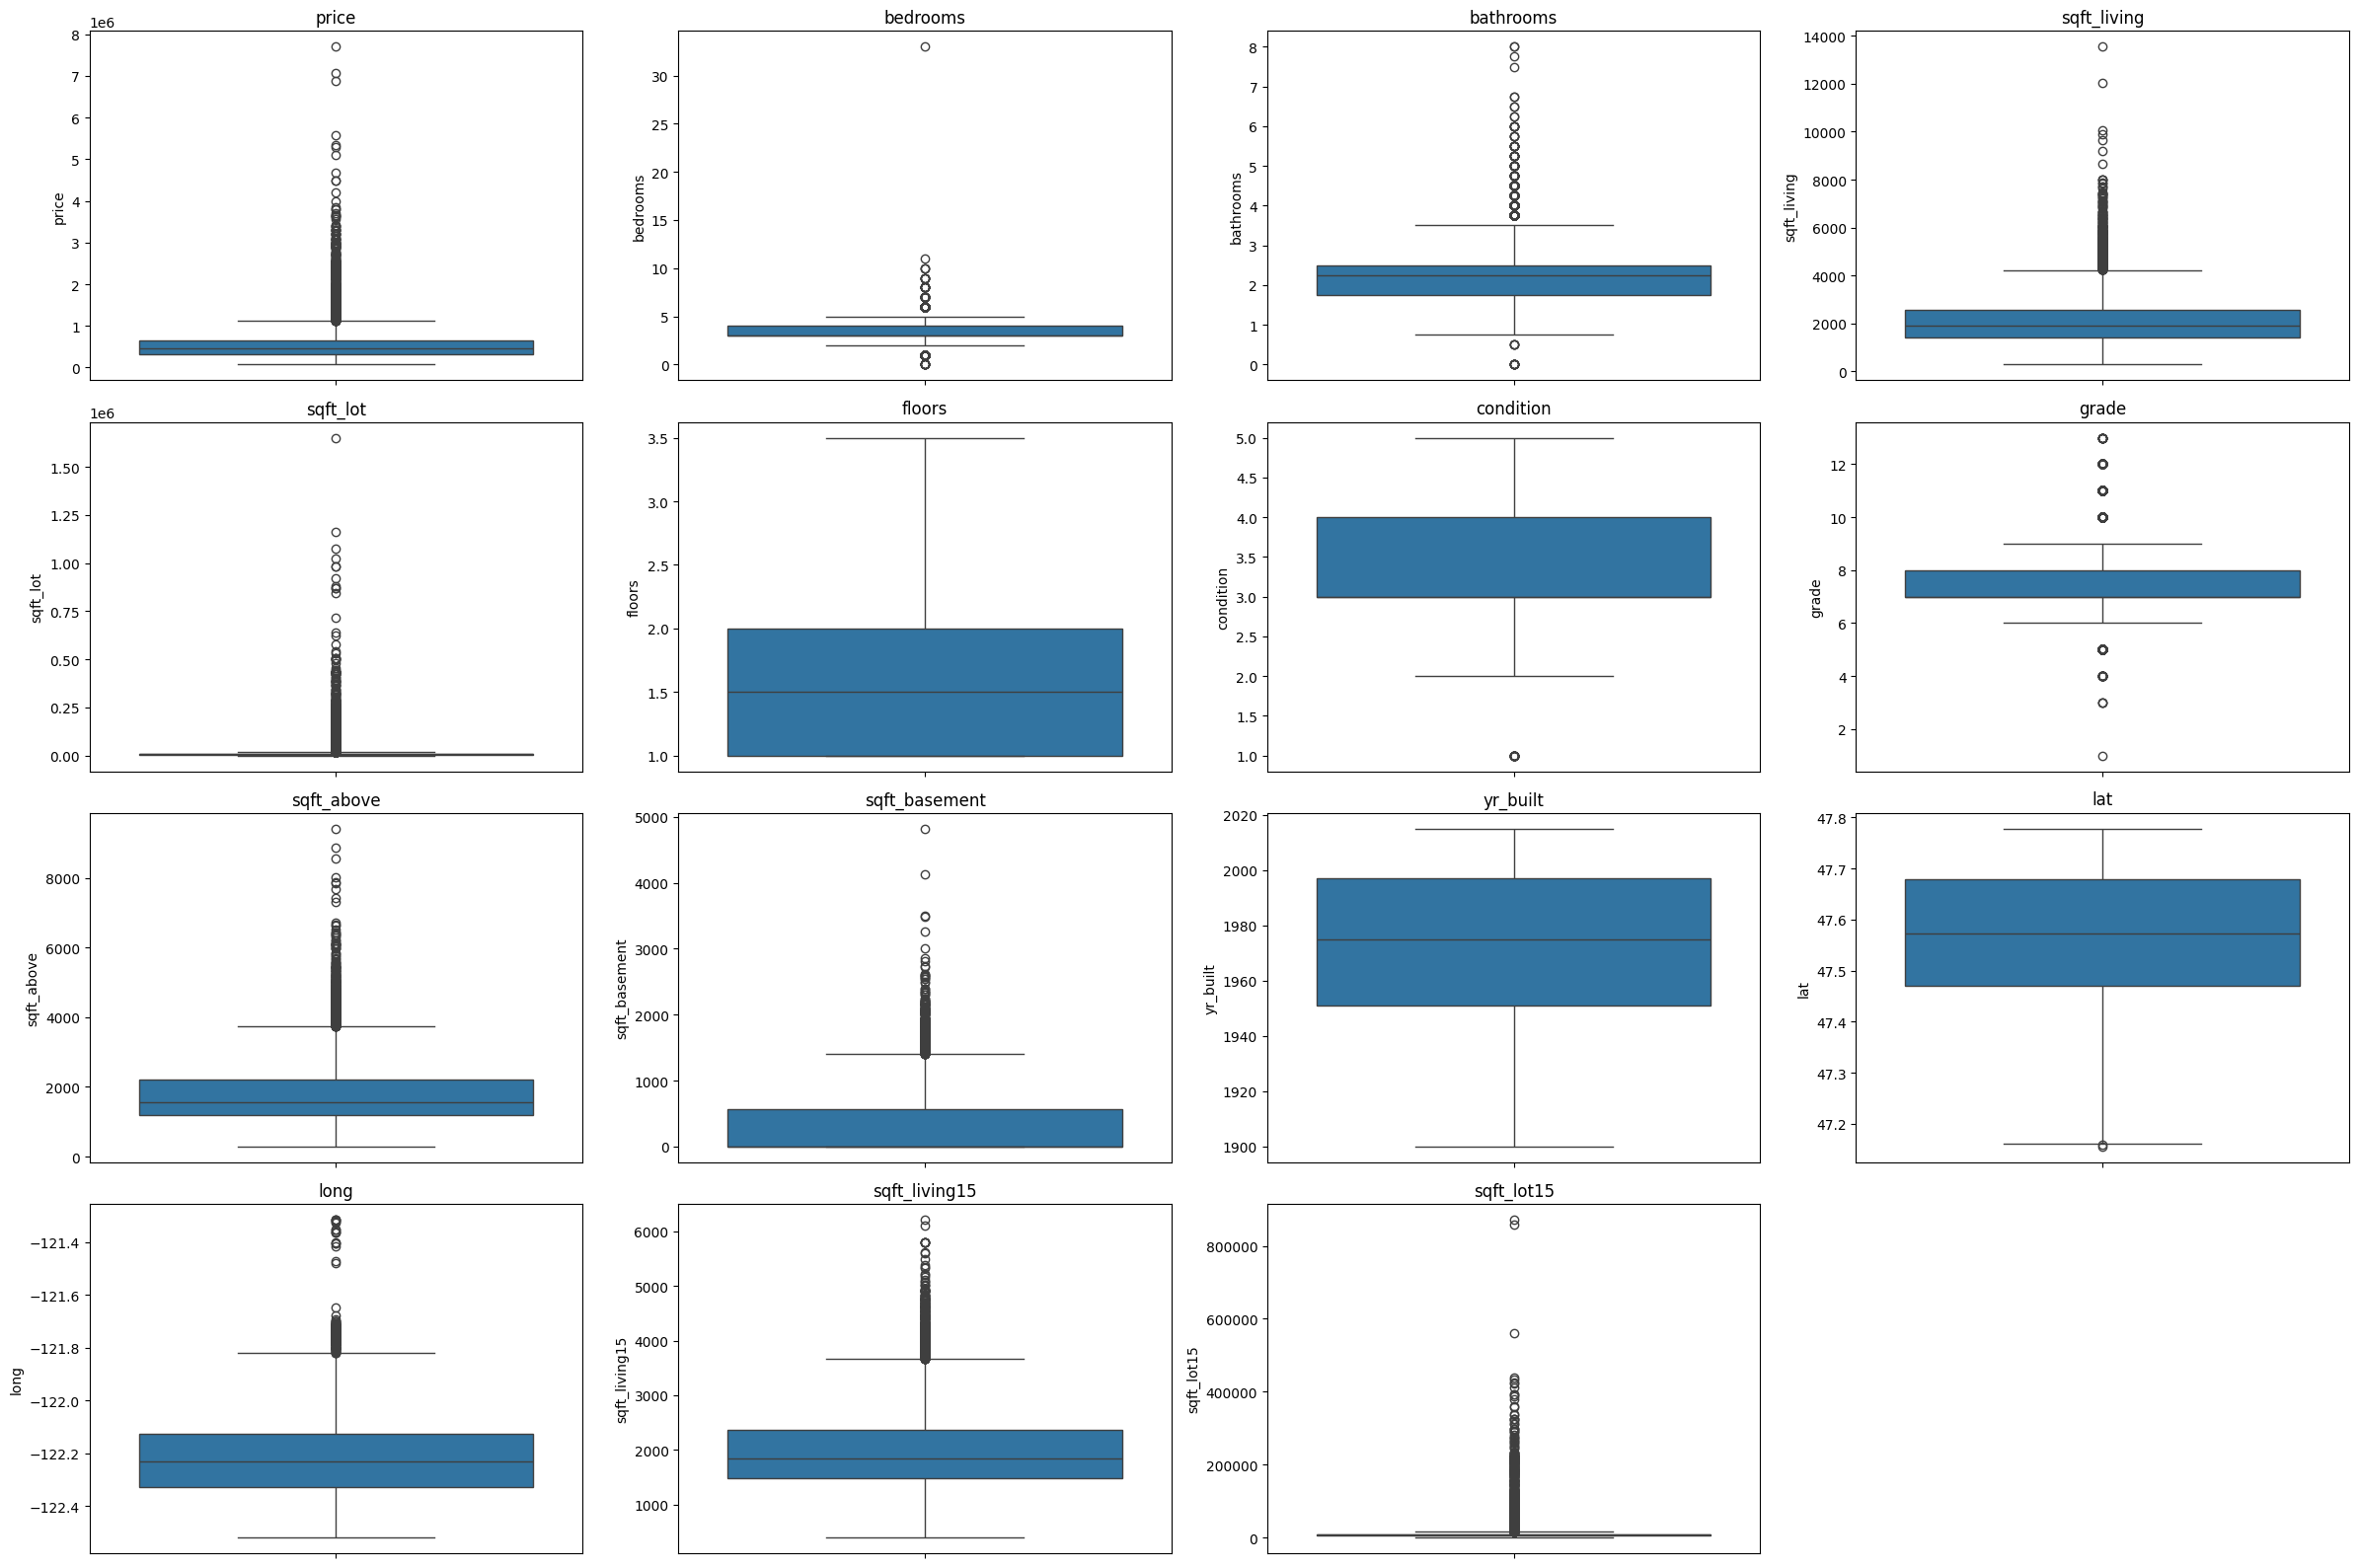

In [64]:
plt.figure(figsize=(24,16))
for feature in df.drop('date',axis=1).columns.to_list():
    plt.subplot(4,4,df.columns.to_list().index(feature))
    sns.boxplot(data=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()    

In [65]:
df.drop(['sqft_lot15','sqft_living15','sqft_above'],axis=1, inplace=True)

In [66]:
df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

### Scaling with standard scaler

In [67]:
datetime_column = df['date']  # Save the datetime column separately


numeric_columns = df.drop(["grade","condition","floors","bathrooms","bedrooms"],axis=1).select_dtypes(include=['float64', 'int64']).columns
numeric_data = df[numeric_columns]

In [68]:
from sklearn.preprocessing import  StandardScaler

scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

scaled_df = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

transform data with power transform (method = yeo-johnson ) to make distribution of data normalized

In [69]:
from sklearn.preprocessing import PowerTransformer

numeric_data = scaled_df[numeric_columns]


transformer = PowerTransformer(method = "yeo-johnson")
transformed_numeric_data = transformer.fit_transform(numeric_data)

In [70]:
# Combine scaled numeric data with the datetime column
transformed_df = pd.DataFrame(transformed_numeric_data, columns=numeric_columns)
transformed_df['date'] = datetime_column 
transformed_df[['grade','condition','floors','bathrooms','bedrooms']] = df[['grade','condition','floors','bathrooms','bedrooms']]

In [71]:
import pickle 

with open('scaler_new.pkl', 'wb') as f:
    pickle.dump(scaler, f)


with open('transformer_new.pkl', 'wb') as f:
    pickle.dump(transformer, f)

### Remove Outliers using IQR

In [72]:
def outliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3-q1

    lower_limit = q1 - iqr * 1.5
    upper_limit = q3 + iqr * 1.5
    ls = df.index[(df[ft]<lower_limit)|(df[ft]>upper_limit)]
    return ls

In [73]:
transformed_df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built', 'lat',
       'long', 'date', 'grade', 'condition', 'floors', 'bathrooms',
       'bedrooms'],
      dtype='object')

In [74]:
index_list = []
for featsure in numeric_columns:
    index_list.extend(outliers(transformed_df,featsure))

In [75]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [76]:
transformed_df = remove(transformed_df,index_list)


In [77]:
transformed_df.shape


(20784, 13)

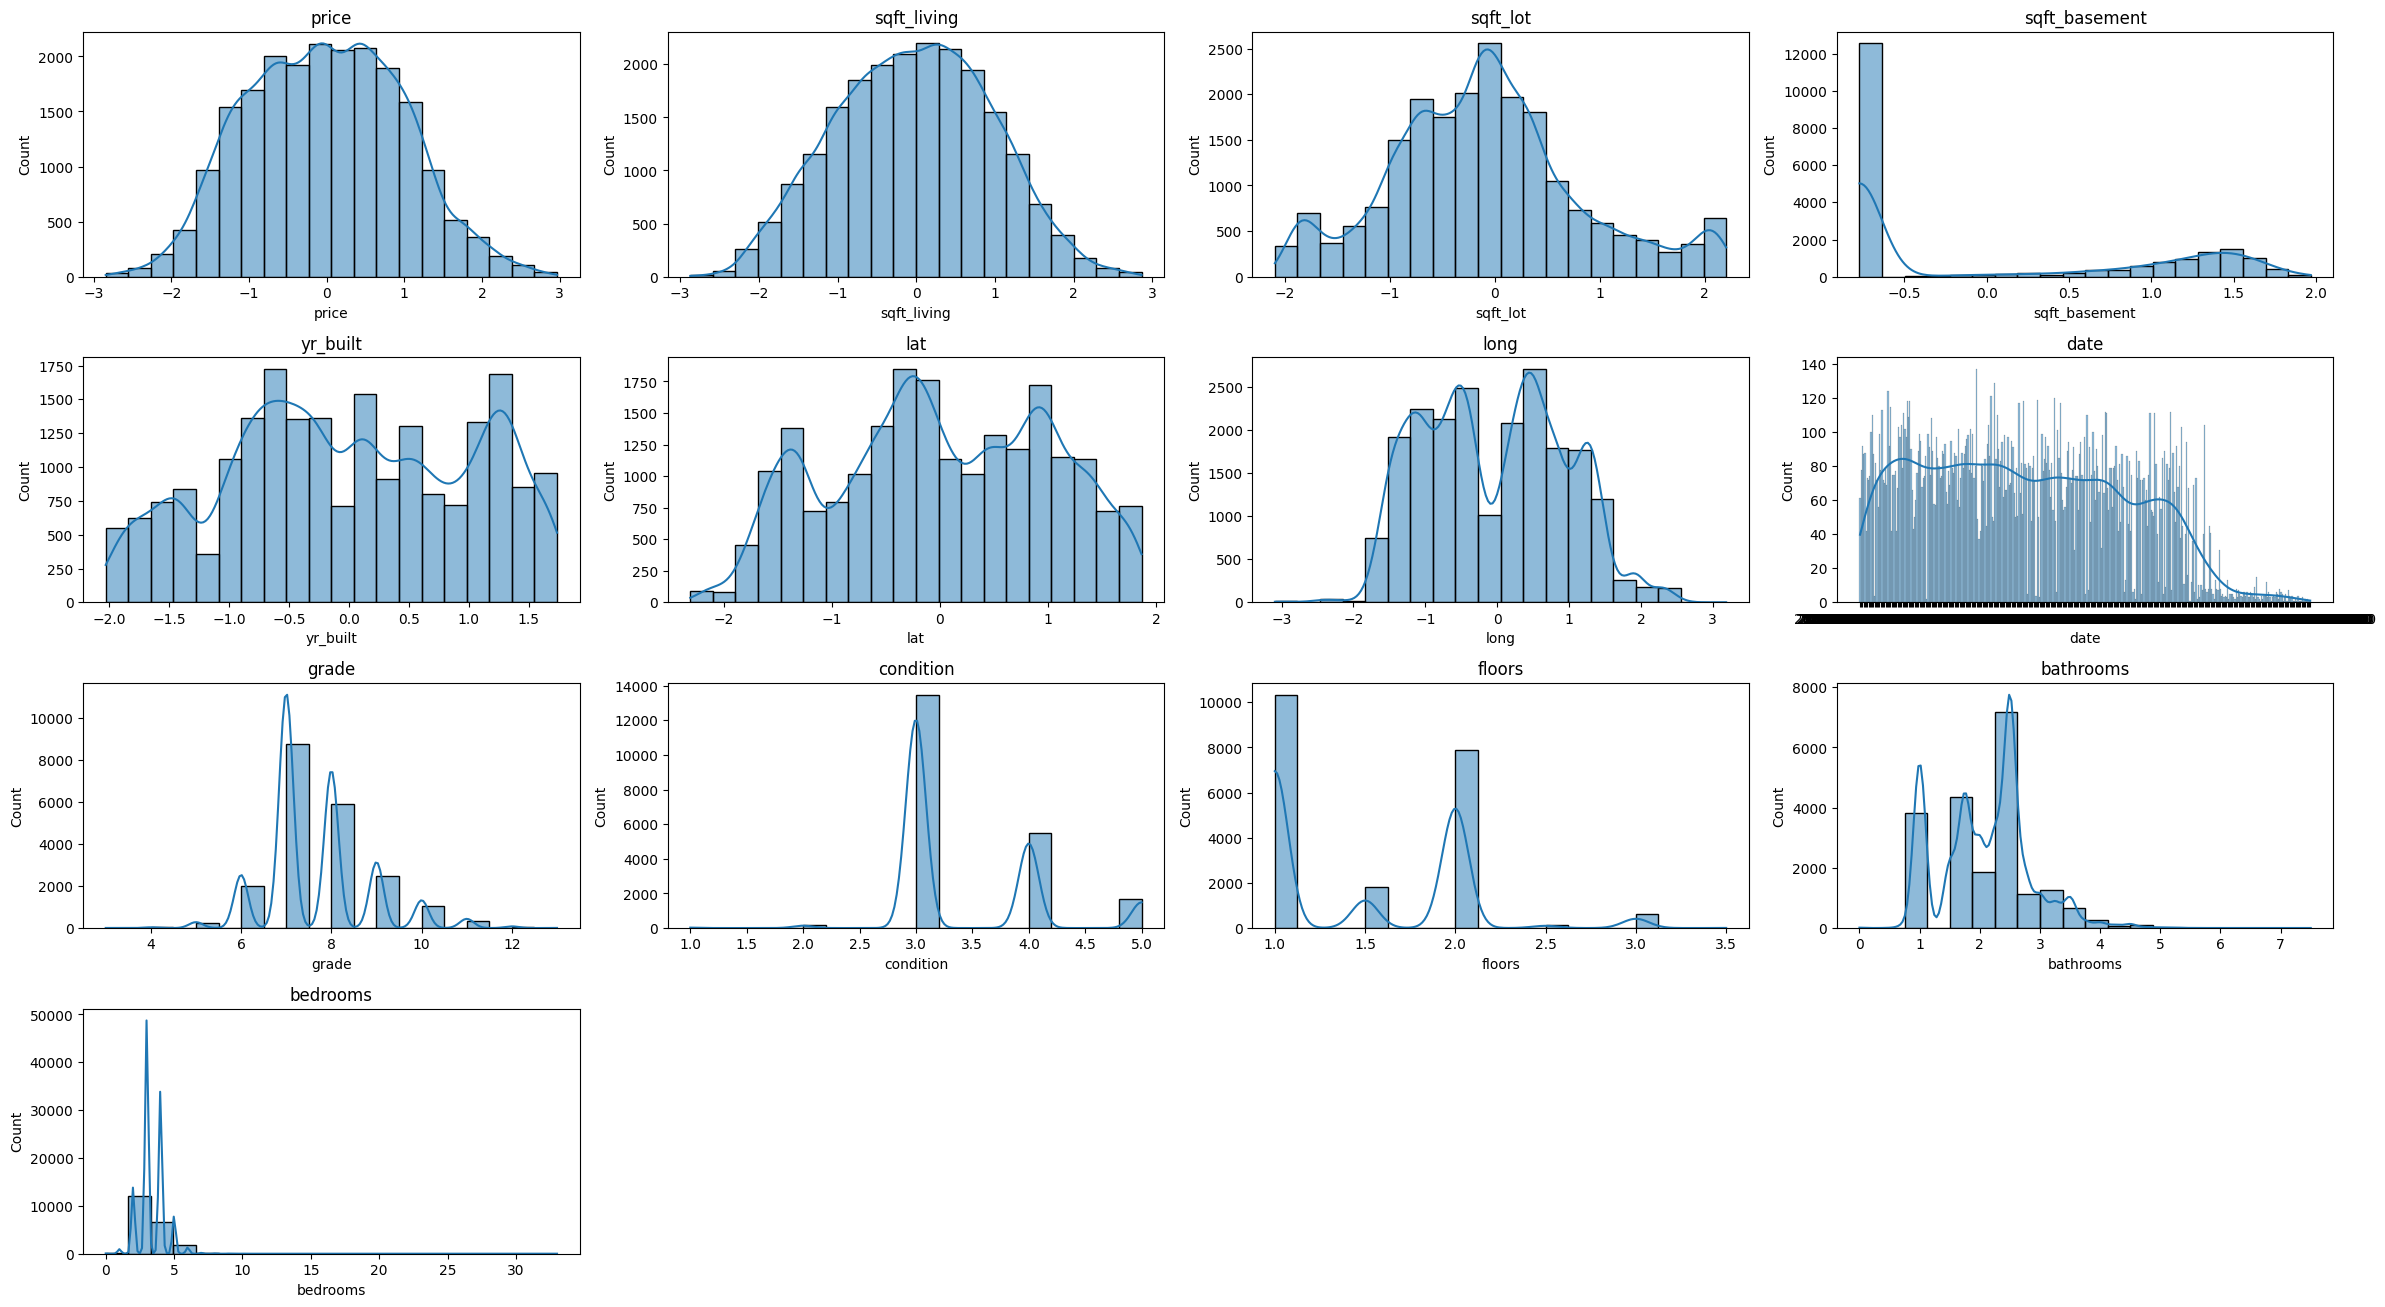

In [78]:
plt.figure(figsize=(24, 16))
for feature in transformed_df.columns.to_list():
    plt.subplot(5, 4, transformed_df.columns.to_list().index(feature) + 1)
    sns.histplot(data=transformed_df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

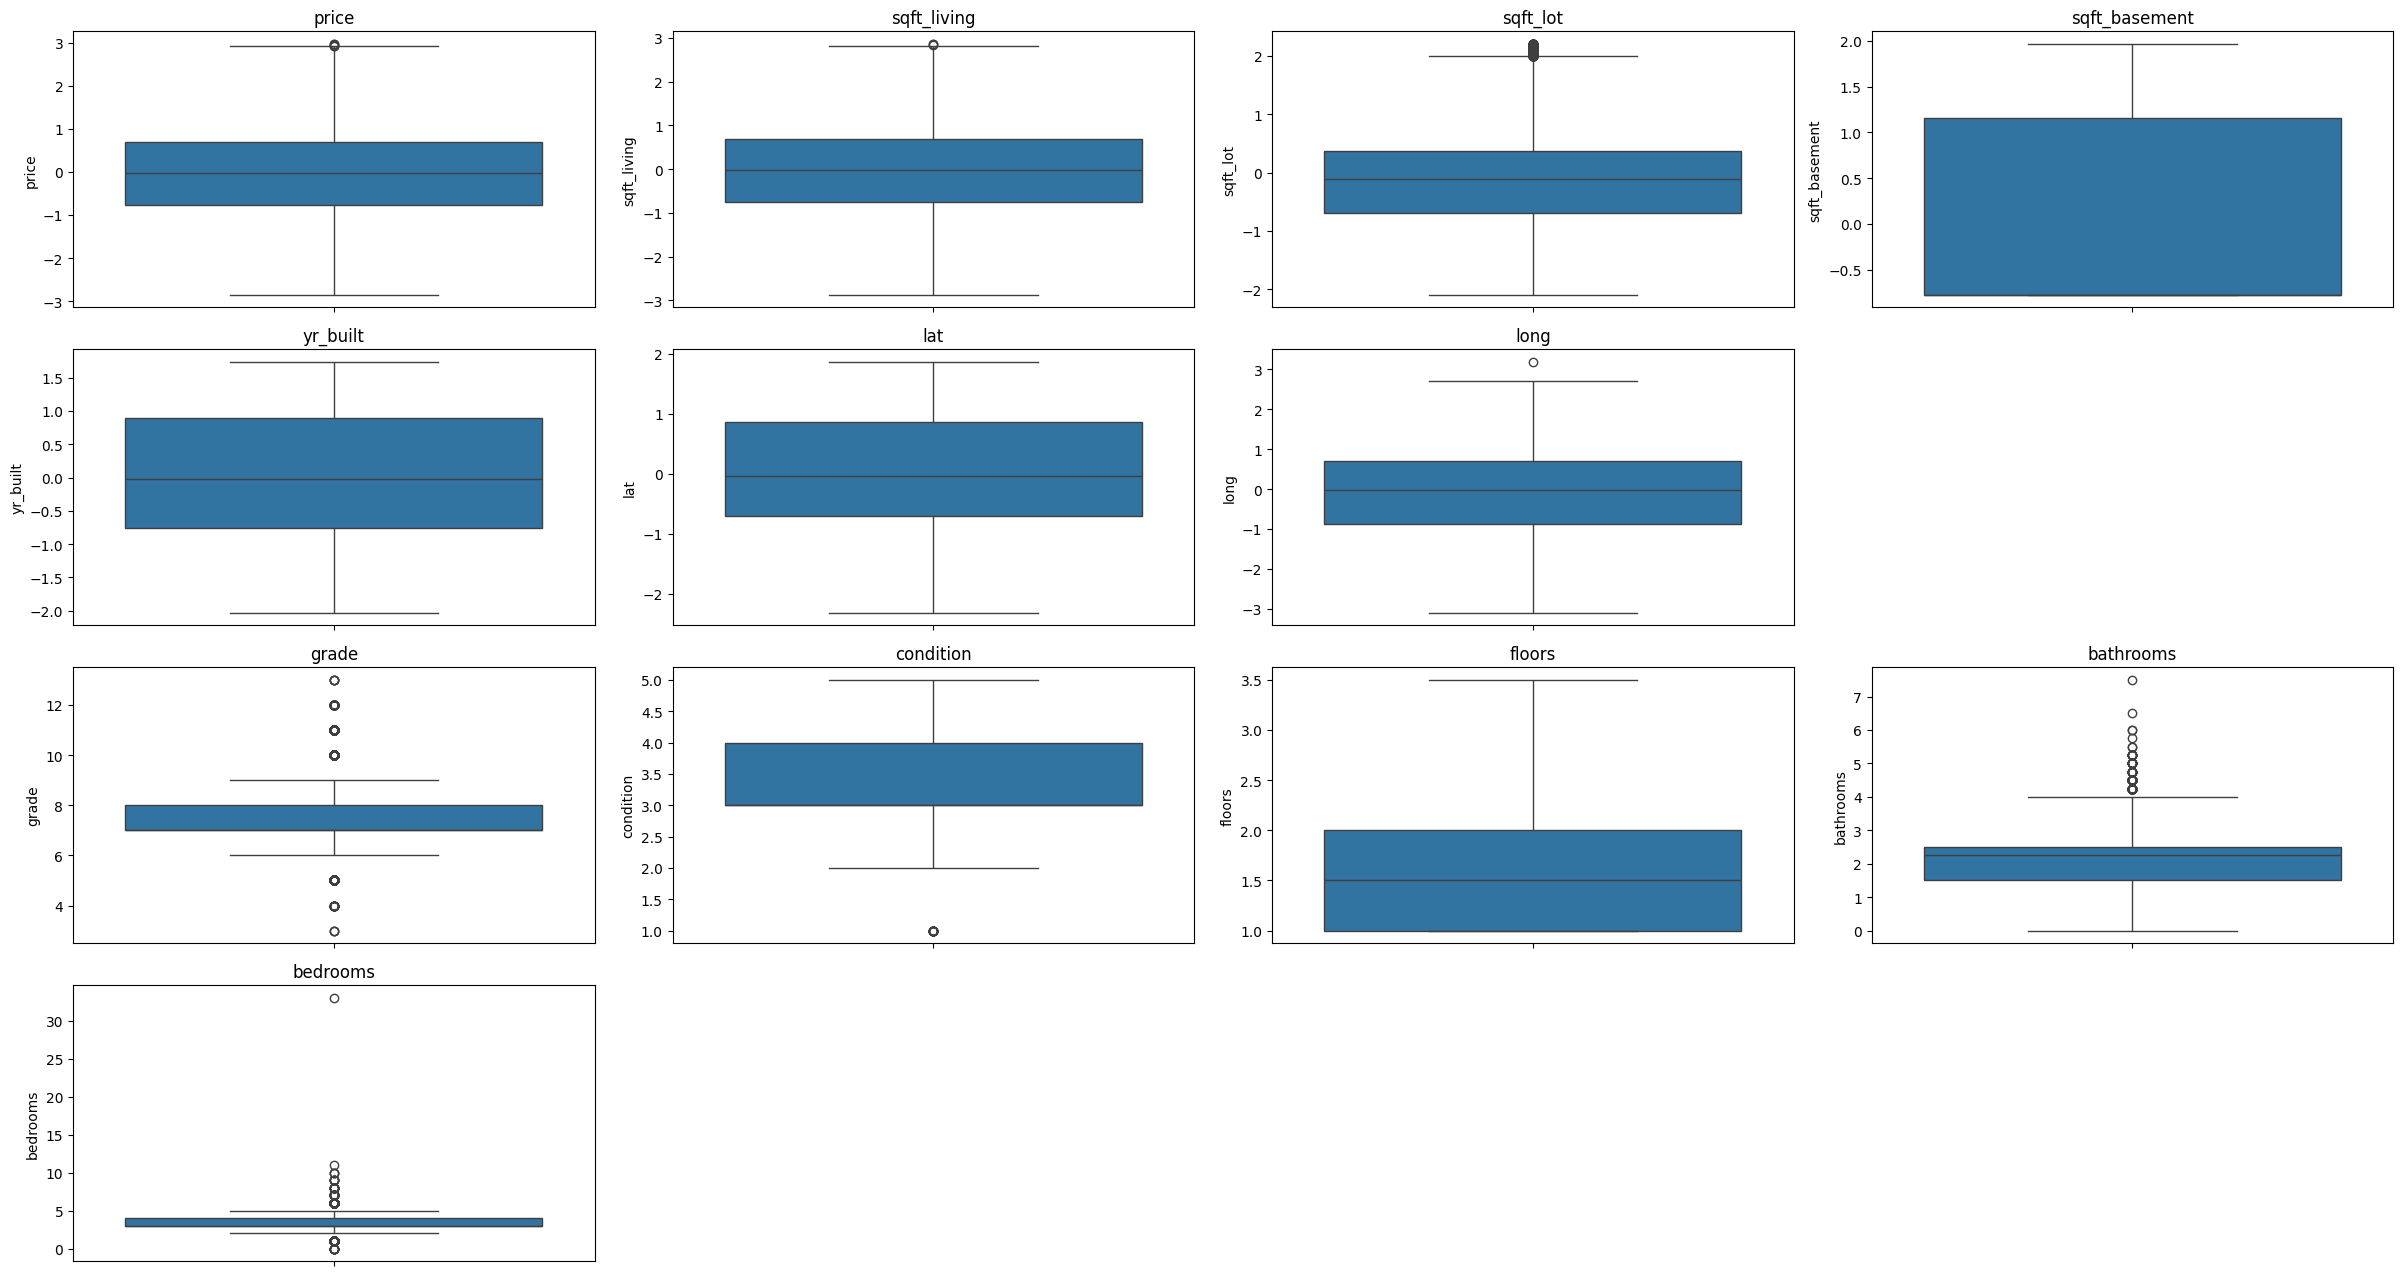

In [79]:
plt.figure(figsize=(24, 16))
for feature in transformed_df.drop('date',axis=1).columns.to_list():
    plt.subplot(5, 4, transformed_df.columns.to_list().index(feature)+1)
    sns.boxplot(data=transformed_df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

### Correlation

In [80]:
transformed_df.drop('date',axis=1,inplace=True)

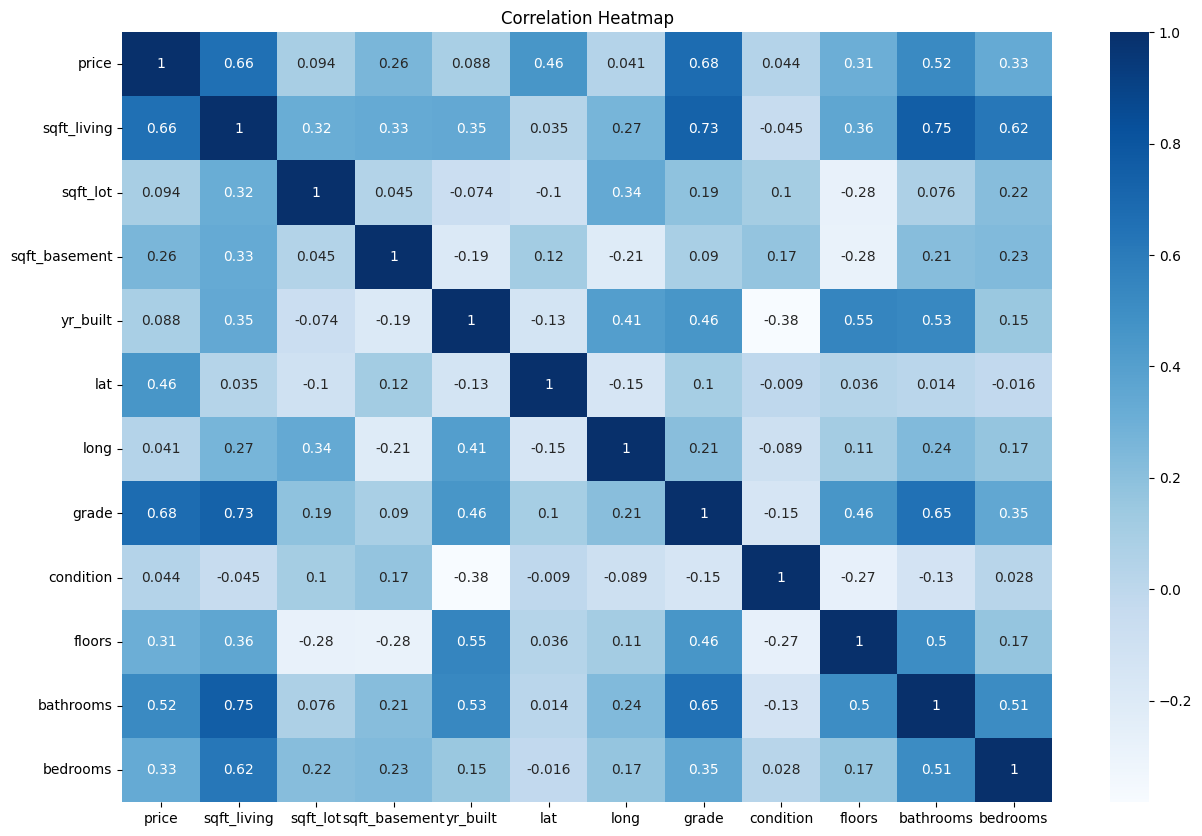

In [81]:
correlation_matrix = transformed_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

### Split the Data

In [82]:
target = 'price'
X = transformed_df.drop(columns=[target])
y = transformed_df[target]

In [83]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((16627, 11), (4157, 11))

### Scaling

In [84]:
feature_scaler = MinMaxScaler()
X_train_normalized = feature_scaler.fit_transform(X_train)
X_test_normalized = feature_scaler.transform(X_test)
label_scaler = MinMaxScaler()
y_train_normalized = label_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_normalized = label_scaler.fit_transform(y_test.values.reshape(-1,1))

### Create an Evaluate Function to give all metrics after model training

In [85]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

### Training ML Models

In [86]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [87]:
model_list = []
r2_list =[]

In [88]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_normalized, y_train_normalized) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_normalized)
    y_test_pred = model.predict(X_test_normalized)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train_normalized, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test_normalized, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0892
- Mean Absolute Error: 0.0701
- R2 Score: 0.7270
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0911
- Mean Absolute Error: 0.0717
- R2 Score: 0.7296


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.1708
- Mean Absolute Error: 0.1409
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1751
- Mean Absolute Error: 0.1444
- R2 Score: -0.0005


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0892
- Mean Absolute Error: 0.0701
- R2 Score: 0.7270
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0911
- Mean Absolute Error: 0.0717
- R2 Score: 0.7295


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0562
- Mean Absolute Error: 0.0404
- R2 Score: 0.8917
----------------------

e:\Projects\House-Price-Prediction\venv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0228
- Mean Absolute Error: 0.0156
- R2 Score: 0.9821
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0595
- Mean Absolute Error: 0.0415
- R2 Score: 0.8846


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0388
- Mean Absolute Error: 0.0283
- R2 Score: 0.9484
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0584
- Mean Absolute Error: 0.0415
- R2 Score: 0.8887


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0450
- Mean Absolute Error: 0.0327
- R2 Score: 0.9307
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0553
- Mean Absolute Error: 0.0391
- R2 Score: 0.9004




e:\Projects\House-Price-Prediction\venv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0800
- Mean Absolute Error: 0.0624
- R2 Score: 0.7805
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0833
- Mean Absolute Error: 0.0651
- R2 Score: 0.7738




### Results

In [89]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.900359
6,XGBRegressor,0.888704
5,Random Forest Regressor,0.884577
3,K-Neighbors Regressor,0.837846
4,Decision Tree,0.786672
8,AdaBoost Regressor,0.773824
0,Linear Regression,0.729553
2,Ridge,0.729473
1,Lasso,-0.000501


### Catboost Regression

In [90]:
cat_model = CatBoostRegressor(verbose=False)
lin_model = cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 90.07


### Plot y_pred and y_test

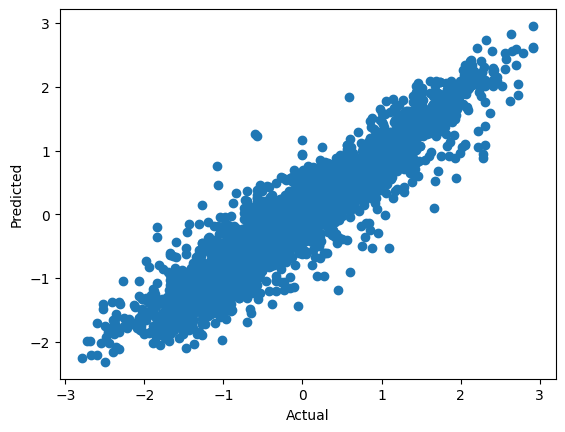

In [91]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

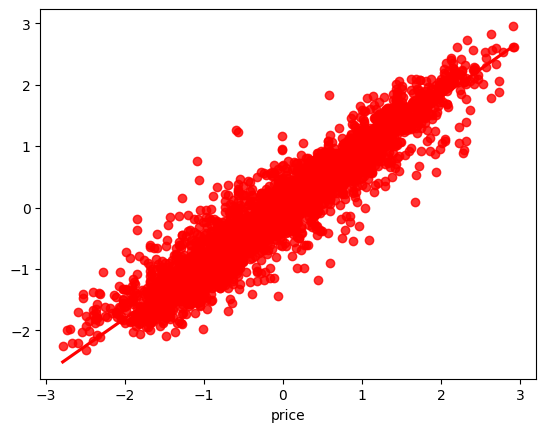

In [92]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


### Difference between Actual and Predicted Values 

In [93]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
838,-1.012136,-0.918822,-0.093314
11418,0.109752,0.414345,-0.304592
13357,1.216466,1.716731,-0.500265
20405,0.222518,0.010497,0.212021
20423,-0.737402,-0.744773,0.007371
...,...,...,...
14376,0.412862,0.192281,0.220582
3800,0.542337,0.277928,0.264410
20317,-0.134939,0.529627,-0.664567
11140,-1.250725,-1.166841,-0.083884


## Training ANN Model

In [94]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_normalized.shape[1],)))  # Hidden layer with 64 neurons
model.add(Dense(64,activation='relu')) # Hidden layer with 64 neurons
model.add(Dense(1)) # Output layer
model.compile(optimizer='adam',loss='mean_squared_error')
history=model.fit(X_train_normalized,y_train_normalized,epochs=100,batch_size=32,validation_split=0.2)
loss=model.evaluate(X_test_normalized,y_test_normalized)
print(f'test_loss:{loss}')


Epoch 1/100


e:\Projects\House-Price-Prediction\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0340 - val_loss: 0.0068
Epoch 2/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0067 - val_loss: 0.0059
Epoch 3/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0060 - val_loss: 0.0054
Epoch 4/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0057 - val_loss: 0.0051
Epoch 5/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0052 - val_loss: 0.0054
Epoch 6/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 7/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 8/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0047 - val_loss: 0.0050
Epoch 9/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 10/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 11/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 12/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [95]:
predictions = model.predict(X_test_normalized)

mae = mean_absolute_error(y_test_normalized, predictions)
mse = mean_squared_error(y_test_normalized, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_normalized,predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R^2): {r2}")

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Mean Absolute Error (MAE): 0.044620237908192
Mean Squared Error (MSE): 0.0038023820350112556
Root Mean Squared Error (RMSE): 0.06166345785804795
R-squared (R^2): 0.8759611489775994


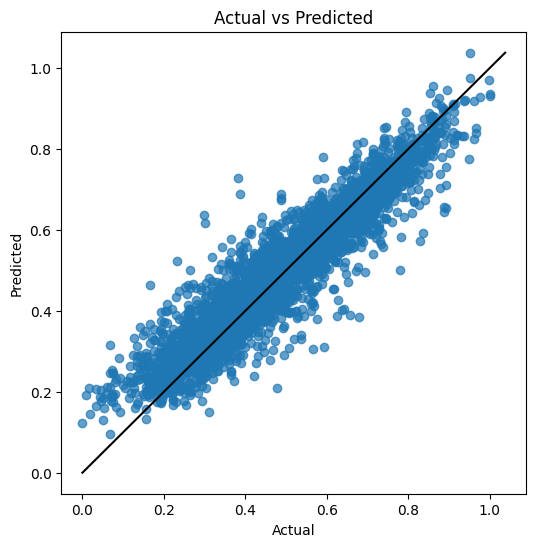

In [96]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_normalized,predictions, alpha=0.7)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')


max_value=max(max(y_test_normalized),max(predictions))
min_value=min(min(y_test_normalized),min(predictions))
plt.plot([min_value,max_value],[min_value,max_value],color='black')
plt.show()